(ch04)=
# Coordinate systems and vectors

Strike and dip, and trend and plunge, are a convenient way to represent the orientation of planes and lines. However, it is difficult to handle these measurements using computation. In this chapter, we will see how to convert linear features (lines and poles to planes) from spherical (trend and plunge) to Cartesian (direction cosines) coordinates, thus representing these features as vectors. This facilitates the analysis of planes and lines using linear algebra and computation, and it will allow us to solve a range of interesting problems using vector operations.

(ch04-1)=
## Coordinate systems

Any point or location in space can be represented by the coordinates of the point with respect to the three orthogonal axes of a Cartesian coordinate system. We will call the axes of this coordinate system $\mathbf{X_1}$, $\mathbf{X_2}$ and $\mathbf{X_3}$ ({numref}`Figure %s <ch04_fig01>`). In addition, we will follow a right-handed naming convention: If you hold your right hand so that your thumb points in the positive direction of the first axis $\mathbf{X_1}$, your other fingers should curl from the positive direction of the second axis $\mathbf{X_2}$ toward the positive direction of the third axis $\mathbf{X_3}$ ({numref}`Figure %s <ch04_fig01>`). Such a coordinate system is called a right-handed coordinate system.

In geosciences, we use mainly two types of right-handed coordinate systems: An east (**E**), north (**N**), up (**U**) coordinate system ({numref}`Figure %s <ch04_fig01>`a), and a north (**N**), east (**E**), down (**D**) coordinate system ({numref}`Figure %s <ch04_fig01>`b). The **ENU** coordinate system is used in GIS and Geophysics when dealing with elevations (e.g. topography), while the **NED** coordinate system is used in Structural Geology where, by convention, angles measured downwards from the horizontal (e.g. plunge of a downward pointing line) are considered positive. In this chapter, we will use mainly the **NED** coordinate system, but when dealing with topography and elevations, we will use the **ENU** coordinate system.

```{figure} /figures/ch04_fig01.png
:width: 550px
:name: ch04_fig01

Right-handed Cartesian coordinate systems. **a.** The **ENU** coordinate system used when dealing with topography, and **b.** The **NED** coordinate system used in Structural Geology. Modified from Allmendinger et al. (2012).
```

(ch04-2)=
## Vectors

(ch04-2-1)=
### Vector components, magnitude, and unit vectors

A line from the origin of the Cartesian coordinate system to a point in space is the position vector of the point. A *vector* is an object that has both a magnitude and a direction. Displacement, velocity, force, acceleration, and poles to planes, are all vectors. A vector is defined by its three components with respect to the axes of the Cartesian coordinate system; these are the projections of the vector onto the axes $\mathbf{X_1}$, $\mathbf{X_2}$ and $\mathbf{X_3}$ ({numref}`Figure %s <ch04_fig02>`a).

```{figure} /figures/ch04_fig02.png
:width: 600px
:name: ch04_fig02

**a.** Components of a vector. **b.** Direction cosines of a unit vector. Modified from Allmendinger et al. (2012).
```

This is expressed by the following equation:

$$
\mathbf{v} = [v_1,v_2,v_3]
$$ (ch04_eq01)

We use lower capital, bold letters to denote vectors. The magnitude (length) of a vector can be computed using Pythagoras’ theorem:

$$
v = \left(v_1^2 + v_2^2 + v_3^2 \right)^{1/2}
$$ (ch04_eq02)

The result is just a number or scalar. We use regular, non-capital letters to denote scalars. If we divide each of the components of a vector by its magnitude, the result is a unit vector, a vector with the same orientation but with a magnitude (length) of one ({numref}`Figure %s <ch04_fig02>`b):

$$
\mathbf{\hat{v}} = \left[\frac{v_1}{v}, \frac{v_2}{v}, \frac{v_3}{v} \right]
$$ (ch04_eq03)

We use a hat to indicate unit vectors. There is a very interesting property of unit vectors; the components of a unit vector are the cosines of the angles the vector makes with the axes of the coordinate system ({numref}`Figure %s <ch04_fig02>`b):

$$
\mathbf{\hat v} = [\cos\alpha,\cos\beta,\cos\gamma]
$$ (ch04_eq04)

these are called the *direction cosines* of the vector. By convention, $\cos\alpha$ is the direction cosine of the vector with respect to $\mathbf{X_1}$, $\cos\beta$ is the direction cosine of the vector with respect to $\mathbf{X_2}$, and $\cos\gamma$ is the direction cosine of the vector with respect to $\mathbf{X_3}$ ({numref}`Figure %s <ch04_fig02>`b).

In Python, we can use the NumPy `linalg.norm` function to compute the magnitude of a vector, and convert the vector to a unit vector as illustrated in the following notebook [ch4-1](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-1.ipynb):

In [1]:
# Import numpy
import numpy as np
from numpy import linalg as la  # Import linear algebra functions


# Make vector
v = np.array([1,2,3])
print("Vector:", v)

# Magnitude of the vector
length = la.norm(v) 
print("Magnitude of the vector:", length)

# Unit vector
v_hat = v / length
print("Unit Vector:", v_hat)

# Magnitude of unit vector
length = la.norm(v_hat) 
print("Magnitude of the unit vector:", length)

Vector: [1 2 3]
Magnitude of the vector: 3.7416573867739413
Unit Vector: [0.26726124 0.53452248 0.80178373]
Magnitude of the unit vector: 1.0


(ch04-2-2)=
### Vector operations

To multiply a scalar times a vector, just multiply each component of the vector by the scalar:

$$
x\mathbf v = [xv_1, xv_2, xv_3]
$$ (ch04_eq06)

This operation is useful, for example, to reverse the direction of a vector; just multiply the vector by -1. To add two vectors, just sum their components:

$$
\mathbf u + \mathbf v = \mathbf v + \mathbf u = [u_1 + v_1, u_2 + v_2, u_3 + v_3]
$$(ch04_eq06)

Vector addition is commutative but vector subtraction is not. Vector addition and subtraction obey the parallelogram rule, whereby the resulting vector bisects the two vectors to be added or subtracted ({numref}`Figure %s <ch04_fig03>`a).

```{figure} /figures/ch04_fig03.png
:width: 600px
:name: ch04_fig03

**a.** Vector addition and subtraction. **b.** Cross product of two unit vectors. Modified from Allmendinger et al. (2012).
```

There are two operations that are unique to vectors: the *dot product* and the *cross product*. The result of the dot product is a scalar and is equal to the magnitude of the first vector times the magnitude of the second vector times the cosine of the angle between the vectors:

$$
\mathbf u \cdot\mathbf v = \mathbf v \cdot\mathbf u = uv\cos\theta = u_1v_1 + u_2v_2 + u_3v_3 = u_iv_i
$$ (ch04_eq07)

The dot product is commutative. If the two vectors are unit vectors, you can easily see that the dot product is the cosine of the angle between the vectors:

$$
\mathbf{\hat u} \cdot\mathbf{\hat v} = \cos\theta = u_1v_1 + u_2v_2 + u_3v_3
$$ (ch04_eq08)

or in terms of the direction cosines of the vectors:

$$
\mathbf{\hat u} \cdot\mathbf{\hat v} = \cos\theta = cos\alpha_1\cos\alpha_2 + \cos\beta_1\cos\beta_2 + \cos\gamma_1\cos\gamma_2
$$ (ch04_eq09)

which as we will see later, it is a great way to find the angle between two unit vectors.

The result of the cross product is another vector. This vector is perpendicular to the other two vectors, and it has a magnitude equal to the product of the magnitudes of the vectors times the sine of the angle between the vectors:

$$
\mathbf u\times\mathbf v = uv\sin\theta\mathbf{\hat l} = [u_2v_3 - u_3v_2, u_3v_1 - u_1v_3, u_1v_2 - u_2v_1]
$$ (ch04_eq10)

The cross product is not commutative. If the vectors are unit vectors, the length of the resulting vector is equal to the sine of the angle between the vectors ({numref}`Figure %s <ch04_fig03>`b). The new vector obeys a right-hand rule; for $\mathbf u\times\mathbf v$, the fingers curl from $\mathbf u$ towards $\mathbf v$ and the thumb points in the direction of the resulting vector, and vice versa ({numref}`Figure %s <ch04_fig03>`b).

In Python, these operations are easy to perform using the NumPy library as shown in the following notebook [ch4-2](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-2.ipynb):

In [2]:
# Import numpy
import numpy as np


# Make vectors
u = np.array([1,2,3])
v = np.array([3,2,1])
print("u =", u)
print("v =", v)

# Scalar multiplication of vector
sv = 3 * u
print("3 * u =", sv)

# Sum of vectors
vsum = u + v
print("u + v =", vsum)

#  Dot product of vectors
dotp = np.dot(u,v)
print("u . v =", dotp)

# Cross product of vectors
crossp = np.cross(u,v) 
print("u x v =", crossp)

u = [1 2 3]
v = [3 2 1]
3 * u = [3 6 9]
u + v = [4 4 4]
u . v = 10
u x v = [-4  8 -4]


(ch04-3)=
## Geological features as vectors

We have now all the mathematical tools needed to represent geological features as vectors. Since we are only interested in the orientation of these features, we will treat lines (and poles to planes) as unit vectors. We will also use the Structural Geology **NED** coordinate system.

(ch04-3-1)=
### From spherical to Cartesian coordinates

{numref}`Figure %s <ch04_fig04>` shows a line as a unit vector $\mathbf{\hat{v}}$ in the **NED** coordinate system. Clearly, the angle that the line makes with the **D** axis is $90^o - \textit{plunge}$, therefore:

```{figure} /figures/ch04_fig04.png
:width: 450px
:name: ch04_fig04

Diagram showing the relations between the trend and plunge and the direction cosines in the **NED** coordinate system. Gray plane is the vertical plane in which the plunge is measured. Modified from Allmendinger et al. (2012).
```

$$
\cos\gamma=\cos(90^o - plunge) = \sin(plunge)
$$ (ch04_eq11)

The horizontal projection of the line is $\cos(plunge)$ ({numref}`Figure %s <ch04_fig04>`). $\cos\alpha$ and $\cos\beta$ are just the **N** and **E** components of this horizontal line and ({numref}`Figure %s <ch04_fig04>`):

$$
\cos\alpha = \cos(trend)\cos(plunge)
$$ (ch04_eq12)

$$
\cos\beta = \cos(90^o - trend)\cos(plunge) = \sin(trend)\cos(plunge)
$$ (ch04_eq13)

{numref}`ch04_tab01` summarizes these equations.

```{list-table} From spherical to Cartesian coordinates of lines and poles.
:header-rows: 1
:name: ch04_tab01

* - Axis
  - Direction cosines
* - **N**
  - $\cos\alpha=\cos(trend)\cos(plunge)$
* - **E**
  - $\cos\beta=\sin(trend)\cos(plunge)$
* - **D**
  - $\cos\gamma=\sin(plunge)$
```

The magnitude and sign of the direction cosines tell us a lot about the orientation of the line ({numref}`Figure %s <ch04_fig05>`). A horizontal line (plunge = 0) has $\cos\gamma=0$, a downward line (plunge $>0$) has positive $\cos\gamma$, and a vertical line (plunge = 90) has $\cos\gamma=1$ ($\cos\alpha$ and $\cos\beta$ are 0). A horizontal or downward line has positive $\cos\alpha$ if it trends to the north (first or fourth quadrants), and positive $\cos\beta$ if it trends to the east (first or second quadrants). If the line trends exactly N or S, $\cos\beta=0$; and if the line trends exactly E or W, $\cos\alpha=0$.

```{figure} /figures/ch04_fig05.png
:width: 450px
:name: ch04_fig05

Lower hemisphere stereonet showing the sign of the direction cosines in each quadrant. In the NE quadrant, all three direction cosines are positive. Modified from Allmendinger et al. (2012).
```

The function [sph_to_cart](https://github.com/nfcd/compGeo/blob/master/source/functions/sph_to_cart.py) converts a line from spherical to Cartesian coordinates. Notice that the `trd` and `plg` of the line should be entered in radians:

In [3]:
import math


def sph_to_cart(trd,plg):
    """
    sph_to_cart converts line from spherical (trend 
    and plunge) to Cartesian (direction cosines) 
    coordinates
    
    sph_to_cart(trd,plg) returns the north (cn),
    east (ce), and down (cd) direction cosines of 
    a line with trend = trd and plunge = plg
    
    NOTE: Angles should be entered in radians
    
    Python function based on the Matlab function
    SphToCart in Allmendinger et al. (2012)
    """
    # Compute direction cosines from trend and plunge
    cn = math.cos(trd) * math.cos(plg)
    ce = math.sin(trd) * math.cos(plg)
    cd = math.sin(plg)
    
    return cn, ce, cd

(ch04-3-2)=
### From Cartesian to spherical coordinates

Converting from direction cosines (Cartesian coordinates) to trend and plunge (spherical coordinates) is a little less straightforward. The plunge is easy:

$$
plunge = \sin^{-1}(\cos\gamma)
$$ (ch04_eq14)

The trend can be determined as follows:

$$
\frac{\cos\beta}{\cos\alpha} = \frac{\sin(trend)\cos(plunge)}{\cos(trend)\cos(plunge)} = \tan(trend)
$$ (ch04_eq15)

or:

$$
trend = \tan^{-1}\left(\frac{\cos\beta}{\cos\alpha}\right)
$$ (ch04_eq16)

The problem is that the trend varies from 0 and 360. For the $\tan^{-1}$ function, there are two possible angles between 0 and 360. Which one should we use? The answer is to use the signs of the direction cosines to determine in which quadrant the trend lies within. By inspection of {numref}`Figure %s <ch04_fig05>`, one can see that:

$$
trend = \tan^{-1}\left(\frac{\cos\beta}{\cos\alpha}\right),\textit{if}\, \cos\alpha > 0
$$ (ch04_eq17)

$$
trend = 180^o + \tan^{-1}\left(\frac{\cos\beta}{\cos\alpha}\right),\textit{if}\, \cos\alpha < 0
$$ (ch04_eq18)

One should also check for the special case of $\cos\alpha=0$:

$$
trend = 90^o,\textit{if}\, \cos\alpha = 0\,\textit{and}\, \cos(\beta)\geq 0
$$ (ch04_eq19)

$$
trend = 270^o, \textit{if}\, \cos\alpha = 0\, \textit{and}\, \cos(\beta) < 0
$$ (ch04_eq20)

The function [cart_to_sph](https://github.com/nfcd/compGeo/blob/master/source/functions/cart_to_sph.py) converts a line from Cartesian to spherical coordinates. Notice that the trend and plunge of the line are returned in radians:

In [4]:
import math

from compgeo.zero_twopi import zero_twopi


def cart_to_sph(cn,ce,cd):
    """
    cart_to_sph converts from Cartesian to spherical coordinates
    
    cart_to_sph(cn,ce,cd) returns the trend (trd)
    and plunge (plg) of a line with north (cn),
    east (ce), and down (cd) direction cosines
    
    NOTE: Trend and plunge are returned in radians
    
    Python function translated from the Matlab function
    CartToSph in Allmendinger et al. (2012)
    """
    pi = math.pi
    # Plunge 
    plg = math.asin(cd) 
    
    # Trend: If north direction cosine is zero, trend
    # is east or west. Choose which one by the sign of
    # the east direction cosine
    if cn == 0.0:
        if ce < 0.0:
            trd = 3.0/2.0 * pi # trend is west
        else:
            trd = pi/2.0 # trend is east
    else:
        trd = math.atan(ce/cn) 
        if cn < 0.0:
            trd = trd + pi 
        # Make sure trend is between 0 and 2*pi
        trd = zero_twopi(trd)
    
    return trd, plg

(ch04-4)=
## Applications

(ch04-4-1)=
### Mean vector

An important problem in geosciences is to determine the average or mean vector that represents a group of lines. These lines can be for example poles to bedding, paleocurrent directions, paleomagnetic poles, or slip vectors on a fault surface. This problem can be solved using vector addition. The resultant vector $\mathbf{r}$ of the sum of the $N$ unit vectors representing the lines has components:

$$
r_1 = \sum_{i = 1}^{N}\alpha_i\qquad r_2 = \sum_{i = 1}^{N}\beta_i\qquad r_3 = \sum_{i = 1}^{N}\gamma_i
$$ (ch04_eq21)

where $\alpha$, $\beta$ and $\gamma$ are the direction cosines of the unit vectors. The length of the resultant vector $\mathbf{r}$ is:

$$
r = \sqrt{r_1^2 + r_2^2 + r_3^2}
$$ (ch04_eq22)

and the direction cosines of the unit vector that is parallel to the mean of the individual vectors are:

$$
\overline{\alpha} = \frac{r_1}{r}\qquad \overline{\beta} = \frac{r_2}{r}\qquad \overline{\gamma} = \frac{r_3}{r}
$$ (ch04_eq23)

These direction cosines define the orientation of the mean vector. The mean resultant length $\overline{r}$ measures how concentrated the individual vectors are or how representative the mean vector is:

$$
\overline{r} = \frac{r}{N}\qquad where\qquad 0\leq\overline{r}\leq 1
$$ (ch04_eq24)

The closer this value is to 1, the better the concentration. The function [calc_mv](https://github.com/nfcd/compGeo/blob/master/source/functions/calc_mv.py) calculates the mean vector for a series of lines. It also calculates the Fisher statistics for the mean vector (Fisher et al., 1987), which is the standard way to represent uncertainties in this analysis. Notice that `calc_mv` uses our two previous functions `sph_to_cart` and `cart_to_sph` to convert from spherical to Cartesian coordinates, and vice versa.

In [5]:
import math

from compgeo.sph_to_cart import sph_to_cart
from compgeo.cart_to_sph import cart_to_sph


def calc_mv(T,P):
    """
    calc_mv calculates the mean vector for a group of lines.
    It calculates the trend (trd) and plunge (plg) of the
    mean vector, its mean resultant length (rave), and
    Fisher statistics (concentration factor (conc), 99 (d99)
    and 95 (d95) % uncertainty cones); for a series of lines
    whose trends and plunges are stored in the arrays T and P
    
    NOTE: Input/Output values are in radians
    
    Python function translated from the Matlab function
    CalcMV in Allmendinger et al. (2012)
    """
    # Number of lines
    nlines = len(T)
    
    # Initialize the 3 direction cosines which contain the
    # sums of the individual vectors 
    cn_sum = ce_sum = cd_sum = 0.0
    
    #Now add up all the individual vectors
    for i in range(nlines):
        cn,ce,cd = sph_to_cart(T[i],P[i])
        cn_sum += cn
        ce_sum += ce
        cd_sum += cd
    
    # r is the length of the resultant vector and
    # rave is the mean resultant length
    r = math.sqrt(cn_sum*cn_sum+ce_sum*ce_sum+cd_sum*cd_sum)
    rave = r/nlines
    # If rave is lower than 0.1, the mean vector is
    # insignificant, return error
    if rave < 0.1:
        raise ValueError("Mean vector is insignificant")
    #Else 
    else:
        # Divide the resultant vector by its length to get
        # the direction cosines of the unit vector
        cn_sum /= r
        ce_sum /= r
        cd_sum /= r
        # Convert the mean vector to the lower hemisphere
        if cd_sum < 0.0:
            cn_sum *= -1.0
            ce_sum *= -1.0
            cd_sum *= -1.0
        # Convert the mean vector to trend and plunge
        trd, plg = cart_to_sph(cn_sum,ce_sum,cd_sum)
        # If there are enough measurements calculate the
        # Fisher statistics (Fisher et al., 1987)
        conc = d99 = d95 = 0.0
        if r < nlines:
            if nlines < 16:
                afact = 1.0-(1.0/nlines)
                conc = (nlines/(nlines-r))*afact**2
            else:
                conc = (nlines-1.0)/(nlines-r)
        if rave >= 0.65 and rave < 1.0:
            afact = 1.0/0.01
            bfact = 1.0/(nlines-1.0)
            d99 = math.acos(1.0-((nlines-r)/r)*(afact**bfact-1.0))
            afact = 1.0/0.05
            d95 = math.acos(1.0-((nlines-r)/r)*(afact**bfact-1.0))
    
    return trd, plg, rave, conc, d99, d95

The notebook [ch4-3](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-3.ipynb) solves the mean vector problem in Ragan (2009, pp. 147), which involves finding the mean orientation of 10 poles to bedding:

Mean vector trend = 208.6, plunge 40.0
Mean resultant length = 0.963


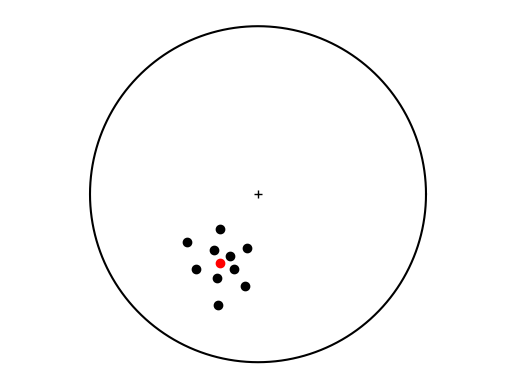

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from compgeo.st_coord_line import st_coord_line
from compgeo.calc_mv import calc_mv


# Arrays T and P contain the trend (T) 
# and plunge (P) of the 10 poles
T = np.radians([206, 220, 204, 198, 200, 188, 192, 
                228, 236, 218])
P = np.radians([32, 30, 46, 40, 20, 32, 54, 56, 36, 44])

# Compute the mean vector and print orientation
# and mean resultant length
trd, plg, rave, conc, d99, d95 = calc_mv(T,P)
pi = np.pi
print("Mean vector trend = {:.1f}, plunge {:.1f}"
      .format(trd*180/pi,plg*180/pi))
print("Mean resultant length = {:.3f}".format(rave))

# Make a figure
fig, ax = plt.subplots()

# Plot the primitive of the stereonet
r = 1; # unit radius
th = np.radians(np.arange(0,361,1))
x = r * np.cos(th)
y = r * np.sin(th)
ax.plot(x,y,"k")
# Plot center of circle
ax.plot(0,0,"k+")
# Make axes equal and remove them
ax.axis("equal")
ax.axis("off")

# Plot the poles as black points
# on an equal angle stereonet
npoles = len(T)
eq_angle = np.zeros((npoles, 2))
for i in range(npoles):
    # Equal angle coordinates
    eq_angle[i,0], eq_angle[i,1] = st_coord_line(T[i],P[i],0)

ax.plot(eq_angle[:,0],eq_angle[:,1],"ko")

# Plot the mean vector as a red point
mvx, mvy = st_coord_line(trd,plg,0)
ax.plot(mvx,mvy,"ro")
plt.show()

Notice that the mean resultant length is close to 1.0, so that the mean vector (red dot) is a representative orientation of the individual vectors (black dots).

(ch04-4-2)=
### Angles, intersections, and poles

Many interesting problems can be solved using the dot and cross product operations. The dot product can be used to find the angle between two lines or planes, while the cross product can be used to find a plane from two lines, or the intersection of two planes. {numref}`ch04_tab02` lists some problems that can be solved using these operations.

```{list-table} Some problems that can be solved using the dot and cross product operations.
:header-rows: 1
:name: ch04_tab02

* - Problem
  - Solution
* - Angle between two lines
  - $\arccos$ of dot product between lines
* - Angle between two planes
  - Supplement of $\arccos$ of dot product between poles to planes
* - Intersection of two planes
  - Cross product of poles to planes
* - Plane containing two lines
  - Pole to plane is cross product of lines
* - Apparent dip of plane
  - Intersection of plane and vertical section of a given orientation
* - Plane from two apparent dips
  - Plane containing the two apparent dips (lines)
```

The functions in the module [angles](https://github.com/nfcd/compGeo/blob/master/source/functions/angles.py) compute the angle between two lines (`angle_bw_lines`), the angle between two planes (`angle_bw_planes`), the plane from two lines (`plane_from_app_dips`), or the intersection of two planes (`int_bw_planes`).

In [7]:
import numpy as np

from compgeo.sph_to_cart import sph_to_cart
from compgeo.cart_to_sph import cart_to_sph
from compgeo.pole import pole_from_plane, plane_from_pole


# Python functions based on the Matlab function
# Angles in Allmendinger et al. (2012)
def angle_bw_lines(trd1, plg1, trd2, plg2):
    """
    angle_bw_lines returns the angle between two lines
    of trend and plunge trd1, plg1, trd2, and plg2
    Input and output angles are in radians
    """
    # convert lines to directions cosines and numpy arrays
    cn1, ce1, cd1 = sph_to_cart(trd1, plg1)
    u = np.array([cn1, ce1, cd1])
    cn2, ce2, cd2 = sph_to_cart(trd2, plg2)
    v = np.array([cn2, ce2, cd2])
    # angle between lines is arccosine of their dot product
    return np.arccos(np.dot(u, v))


def angle_bw_planes(str1, dip1, str2, dip2):
    """
    angle_bw_planes returns the angle between two planes
    of strike and dip str1, dip1, str2, and dip2
    Input and output angles are in radians
    """
    # compute poles to lines
    pole1_trd, pole1_plg = pole_from_plane(str1, dip1)
    pole2_trd, pole2_plg = pole_from_plane(str2, dip2)
    # find angle between poles
    angle = angle_bw_lines(pole1_trd, pole1_plg, 
        pole2_trd, pole2_plg)
    # angle between planes is the complementary angle
    return (np.pi - angle)


def pole_from_lines(trd1, plg1, trd2, plg2):
    """
    pole_from_lines compute the pole to a plane given
    two lines on the plane, with trend and plunge trd1, plg1,
    trd2, and plg2
    Input and output angles are in radians
    """
    # convert lines to direction cosines and numpy arrays
    cn1, ce1, cd1 = sph_to_cart(trd1, plg1)
    u = np.array([cn1, ce1, cd1])
    cn2, ce2, cd2 = sph_to_cart(trd2, plg2)
    v = np.array([cn2, ce2, cd2])
    # normal is cross product between vectors
    pole = np.cross(u, v)
    # make pole a unit vector
    norm = np.linalg.norm(pole)
    pole = pole/norm
    # if pole points upwards, make it point downwards
    if pole[2] < 0:
        pole *= -1.0
    # return trend and plunge of pole
    return cart_to_sph(pole[0], pole[1], pole[2])


def plane_from_app_dips(trd1, plg1, trd2, plg2):
    """
    plane_from_app_dips returns the strike and dip of a plane
    from two apparent dips with trend and plunge trd1, plg1,
    trd2, and plg2
    Input and output angles are in radians
    """
    # Compute pole to plane from apparent dips (lines)
    pole_trd, pole_plg = pole_from_lines(trd1,plg1,trd2,plg2)
    # return strike and dip of plane
    return plane_from_pole(pole_trd, pole_plg)


def int_bw_planes(str1, dip1, str2, dip2):
    """
    int_bw_planes returns the intersection between two planes
    of strike and dip str1, dip1, str2, dip2
    Input and output angles are in radians
    """
    # compute poles to planes
    pole1_trd, pole1_plg = pole_from_plane(str1, dip1)
    pole2_trd, pole2_plg = pole_from_plane(str2, dip2)
    # intersection is normal to poles
    return pole_from_lines(pole1_trd, pole1_plg, pole2_trd, 
        pole2_plg)

The notebook [ch4-4](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-4.ipynb) illustrates the use of these functions to solve several problems. Let’s start with the following problem from Leyshon and Lisle (1996): Two limbs of a chevron fold (A and B) have orientations (RHR) as follows: Limb A = 120/40, Limb B = 250/60. Determine: (a) the trend and plunge of the hinge line of the fold, (b) the rake of the hinge line in limb A, (c) the rake of the hinge line in limb B.

In [8]:
import numpy as np
pi = np.pi

from compgeo.angles import angle_bw_lines
from compgeo.angles import int_bw_planes


# Strike and dip of the limbs in radians
str1, dip1 = np.radians([120, 40])
str2, dip2 = np.radians([250, 60])

# (a) Chevron folds have planar limbs. The hinge
# of the fold is the intersection of the limbs
htrd, hplg = int_bw_planes(str1,dip1,str2,dip2)
print("Hinge trend = {:.1f}, plunge {:.1f}"
      .format(htrd*180/pi,hplg*180/pi))

# The rake of the hinge on either limb is the angle 
# between the hinge and the strike line on the limb. 
# This line is horizontal and has plunge = 0
plg = 0

# (b) For the SW dipping limb
ang = angle_bw_lines(str1,plg,htrd,hplg)
print("Rake of hinge in SW dipping limb = {:.1f} E"
      .format(ang*180/pi))

# (c) And for the NW dipping limb
ang = angle_bw_lines(str2,plg,htrd,hplg)
print("Rake of hinge in NW dipping limb = {:.1f} W"
      .format(ang*180/pi))

Hinge trend = 265.8, plunge 25.3
Rake of hinge in SW dipping limb = 138.4 E
Rake of hinge in NW dipping limb = 29.5 W


Let’s do another problem from the same book: A quarry has two walls, one trending 002 and the other 135. The apparent dip of bedding on the faces are 40N and 30SE respectively. Calculate the strike and dip of bedding.

In [9]:
# Import function
from compgeo.angles import plane_from_app_dips


# The apparent dips are just two lines on bedding
# These lines have orientations:
trd1, plg1 = np.radians([2, 40])
trd2, plg2 = np.radians([135, 30])

# Calculate bedding from these two apparent dips
strike, dip = plane_from_app_dips(trd1,plg1,trd2,plg2)
print("Bedding strike = {:.1f}, dip {:.1f}"
      .format(strike*180/pi,dip*180/pi))

Bedding strike = 333.9, dip 60.7


And the final problem also from the same book: Slickenside lineations trending 074occur on a fault with orientation 300/50 (RHR). Determine the plunge of these lineations and their rake in the plane of the fault.

In [10]:
# The lineation on the fault is just the intersection
# of a vertical plane with a strike equal to
# the trend of the lineation, and the fault
str1, dip1 = np.radians([74, 90])
str2, dip2 = np.radians([300, 50])

# Find the intersection of these two planes which is
# the lineation on the fault
ltrd, lplg = int_bw_planes(str1,dip1,str2,dip2)
print("Slickensides trend = {:.1f}, plunge {:.1f}"
      .format(ltrd*180/pi,lplg*180/pi))

# And the rake of this lineation is the angle
# between the lineation and the strike line on the fault
plg = 0
ang = angle_bw_lines(str2,plg,ltrd,lplg)
print("Rake of slickensides = {:.1f} W".format(ang*180/pi))

Slickensides trend = 74.0, plunge 40.6
Rake of slickensides = 121.8 W


There are many interesting problems you can solve using these functions. You will find more problems in [Section 4.6](ch04-6).

(ch04-4-3)=
### Three points problem

The three points problem is a fundamental problem in geology. It is based on the fact that three non-collinear points on a plane define the orientation of the plane. The graphical solution to this problem is introduced early in Geosciences. It involves finding the strike line (a line connecting two points of equal elevation) on the plane, and the dip from two strike lines (two structure contours) on the plane.

However, there is an easier and more accurate solution to this problem using linear algebra: The three points on the plane define two lines, and the cross product between these lines is parallel to the pole to the plane, from which the orientation of the plane can be estimated. The function [three_points](https://github.com/nfcd/compGeo/blob/master/source/functions/three_points.py) computes the strike and dip of a plane from the east (**E**), north (**N**), and up (**U**) coordinates of three points on the plane:

In [11]:
import numpy as np

from compgeo.cart_to_sph import cart_to_sph
from compgeo.pole import plane_from_pole


def three_points(p1,p2,p3):
    """
    three_points calculates the strike (strike) and dip (dip)
    of a plane given the east (E), north (N), and up (U)
    coordinates of three non-collinear points on the plane
    
    p1, p2 and p3 are 1 x 3 arrays defining the location
    of the points in an ENU coordinate system. For each one
    of these arrays the first, second and third entries are 
    the E, N and U coordinates, respectively
    
    NOTE: strike and dip are returned in radians and they
    follow the right-hand rule format
    """
    # make vectors v (p1 - p3) and u (p2 - p3)
    v = p1 - p2
    u = p2 - p3
    # take the cross product of v and u
    vcu = np.cross(v,u)
    
    # make this vector a unit vector
    mvcu = np.linalg.norm(vcu) # magnitude of the vector
    if mvcu == 0: # If points collinear
        raise ValueError("Error: points are collinear")
    
    vcu = vcu/mvcu # unit vector
    
    # make the pole vector in NED coordinates
    p = np.array([vcu[1], vcu[0], -vcu[2]])
    
    # Make pole point downwards
    if p[2] < 0:
        p *= -1.0
    
    # find the trend and plunge of the pole
    trd, plg = cart_to_sph(p[0],p[1],p[2])
    
    # find strike and dip of plane
    strike, dip = plane_from_pole(trd, plg)
    
    return strike, dip

Let’s use this function in the following problem. The geologic map in {numref}`Figure %s <ch04_fig06>` shows a sequence of sedimentary units dipping south (you can deduce this by the outcrop V in the valley). Points 1, 2 and 3 are located on the base of unit S and their **ENU** coordinates are:

point1 = \[509, 2041, 400\]

point2 = \[1323, 2362, 500\]

point3 = \[2003, 2913, 700\]

Calculate the strike and dip of the plane. The notebook [ch4-5](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-5.ipynb) shows the solution to this problem:  

```{figure} /figures/ch04_fig06.png
:width: 500px
:name: ch04_fig06

Geologic map of sedimentary units dipping south (Bennison et al., 2011). Points 1 to 3 on the base of unit S are used to estimate the orientation of bedding. Notice that the origin is at the map lower left corner.
```

In [12]:
import numpy as np
pi = np.pi

# Import function three_points
from compgeo.three_points import three_points


# ENU coordinates of the three points
p1 = np.array([509, 2041, 400])
p2 = np.array([1323, 2362, 500])
p3 = np.array([2003, 2913, 700])

# Compute the orientation of the plane
strike, dip = three_points(p1,p2,p3)
print("Plane strike = {:.1f}, dip = {:.1f}"
      .format(strike*180/pi,dip*180/pi))

Plane strike = 84.5, dip = 22.5


(ch04-5)=
## Uncertainties

As we saw in [Section 3.2.5](ch03-2-5), the strike and dip or trend and plunge measurements have errors ({numref}`Figure %s <ch03_fig06>` and {numref}`Figure %s <ch03_fig07>`), and these errors propagate in any computation making use of these angles. Also, as accurate as GPS and elevation measurements are today, they also have errors. Thus, the functions in the module `angles` and the function `three_points` lack this important element of uncertainty.

Suppose that $x, ..., z$ are measured with uncertainties (or errors) $\delta x, ..., \delta z$ and the measured values are used to compute the function $q(x,...,z)$. If the uncertainties in $x, ..., z$ are independent and random, then the uncertainty (or error) in $q$ is (Taylor, 1997):

$$
\delta q=\sqrt{\left(\frac{\partial q}{\partial x}\delta x \right)^2+...+\left(\frac{\partial q}{\partial z}\delta z \right)^2}
$$ (ch04_eq25)

This formula is easy to calculate for a few operations, but it can become quite difficult for a long chain of operations. Fortunately, there is a Python package that handles calculations with numbers with uncertainties. This package is called `uncertainties` and it was developed by Eric Lebigot. You can find details about the package as well as instructions for installing it in the [uncertainties](https://pythonhosted.org/uncertainties/) website. You can install the uncertainties package by entering in a terminal:

``` bash
pip install --upgrade uncertainties
```

After this, you can use the uncertainties package. The module [angles_u](https://github.com/nfcd/compGeo/blob/master/source/functions/angles_u.py) and the function [three_points_u](https://github.com/nfcd/compGeo/blob/master/source/functions/three_points_u.py) in the resource git repository, are the corresponding `angles` module and `three_points` function with uncertainties. We don’t list these here, but rather illustrate their use in the following notebook [ch4-6](https://github.com/nfcd/compGeo/blob/master/source/notebooks/ch4-6.ipynb).

In the first problem on page 64, the uncertainty in strike is 4and in dip is 2. What is the uncertainty in the hinge orientation and its rake on the limbs? This problem can be solved as follows:

In [13]:
# Import libraries
import numpy as np
pi = np.pi

from uncertainties import ufloat

# Import functions
from compgeo.angles_u import angle_bw_lines_u
from compgeo.angles_u import int_bw_planes_u


# Strike and dip of the limbs in radians
str1, dip1 = np.radians([120, 40]) # SW dipping limb
str2, dip2 = np.radians([250, 60]) # NW dipping limb

# Errors in strike and dip in radians
ustr, udip = np.radians([4, 2])

# Create the input values with uncertainties
str1 = ufloat(str1, ustr)  # str1 = str1 +/-ustr
dip1 = ufloat(dip1, udip)  # dip1 = dip1 +/-udip
str2 = ufloat(str2, ustr)  # str2 = str2 +/-ustr
dip2 = ufloat(dip2, udip)  # dip2 = dip2 +/-udip

# (a) Chevron folds have planar limbs. The hinge
# of the fold is the intersection of the limbs
htrd, hplg = int_bw_planes_u(str1,dip1,str2,dip2)
print("Hinge trend = {:.1f}, plunge {:.1f}"
      .format(htrd*180/pi,hplg*180/pi))

# The rake of the hinge on either limb is the angle 
# between the hinge and the strike line on the limb. 
# This line is horizontal and has plunge = 0
plg = ufloat(0, udip)  # plg = 0 +/-udip

# (b) For the SW dipping limb
ang = angle_bw_lines_u(str1,plg,htrd,hplg)
print("Rake of hinge in SW dipping limb = {:.1f} E"
      .format(ang*180/pi))

# (c) And for the NW dipping limb
ang = angle_bw_lines_u(str2,plg,htrd,hplg)
print("Rake of hinge in NW dipping limb = {:.1f} W"
      .format(ang*180/pi))

Hinge trend = 265.8+/-3.3, plunge 25.3+/-2.6
Rake of hinge in SW dipping limb = 138.4+/-4.6 E
Rake of hinge in NW dipping limb = 29.5+/-3.5 W


In the map of {numref}`Figure %s <ch04_fig06>`, the error in east and north coordinates is 10 m, and in elevation is 5 m. What is uncertainty in the strike and dip of the T-S contact?

In [14]:
# Import function three_points_u
from compgeo.three_points_u import three_points_u


# ENU coordinates of the three points
# with uncertainties in E-N = 10, and U = 5
p1 = np.array([ufloat(509, 10), ufloat(2041, 10), 
               ufloat(400, 5)])
p2 = np.array([ufloat(1323, 10), ufloat(2362, 10), 
               ufloat(500, 5)])
p3 = np.array([ufloat(2003, 10), ufloat(2913, 10), 
               ufloat(700, 5)])

# Compute the orientation of the plane
strike, dip = three_points_u(p1,p2,p3)
print("Plane strike = {:.1f}, dip = {:.1f}"
      .format(strike*180/pi,dip*180/pi))

Plane strike = 84.5+/-3.5, dip = 22.5+/-2.7


(ch04-6)=
## Exercises

Problems 1-3 are from Marshak and Mitra (1988). Solve these problems using the module `angles`.

1. A fault surface has an orientation (RHR) 190/80. Slickenlines on the fault trend 300.

    1.  What is the plunge of the lineation?
    
    2.  What is the rake of the lineation on the fault?

2. A shale bed has an orientation (RHR) 115/42. What is the apparent dip of the bed in the direction 265?

3. A sandstone bed strikes 140across a stream. The stream flows down a narrow gorge with vertical walls. The apparent dip of the bed on the walls of the gorge is 095/25. What is the true dip of the bed?

4. In the geologic map of {numref}`Figure %s <ch04_fig07>`, points 1 to 9 have the following **ENU** coordinates:

    - point1 = \[1580, 379, 400\]
    - point2 = \[1234, 992, 300\]
    - point3 = \[2054, 1753, 400\]
    - point4 = \[448, 1424, 600\]
    - point5 = \[1921, 2195, 500\]
    - point6 = \[1408, 3737, 300\]
    - point7 = \[536, 2196, 700\]
    - point8 = \[743, 2963, 600\]
    - point9 = \[2720, 2963, 600\]

    1. Compute the strike and dip of the coal seam (points 1-3).
    
    2. Compute the strike and dip of the contact where the blue points 4-6 are located. What kind of contact is this? Is the coal seam below or above this contact?
    
    3. Compute the strike and dip of the contact between units Y and Z (points 7-9). Is this contact below or above the contact in b?
    
    4. The line of section V-W has a trend of 142. What is the apparent dip of the three contacts above along the section?
    
    5. Draw a schematic cross section along line V-W

    :::{hint}
	Use function `three_points` to solve a, b and c. Use the module `angles` to solve d.
	:::

    ```{figure} /figures/ch04_fig07.png
    :width: 500px
    :name: ch04_fig07

    Map for exercise 4. This is map 10 of Bennison et al. (2011).
    ```

5. The map of {numref}`Figure %s <ch04_fig08>` shows an area of a reconnaissance survey in the Appalachian Valley and Ridge Province of western Maryland, USA. On the western half of the map, the contact between a shale horizon (B) and a sandstone unit (C) has been located in two areas. Three points on this contact have the following **ENU** coordinates:

    - point1 = \[862, 943, 500\]
    - point2 = \[692, 1212, 600\]
    - point3 = \[1050, 2205, 600\]

    ```{figure} /figures/ch04_fig08.png
    :width: 600px
    :name: ch04_fig08

    Map for exercise 5.
    ```

    On the eastern half of the map, the contact between B and C was found exposed at three locations labelled x, y, and z. The **ENU** coordinates of these points are:

    - pointx = \[3298, 1487, 300\]
    - pointy = \[3203, 1031, 200\]
    - pointz = \[3894, 590, 400\]

    1. Compute the strike and dip of the contact on the western half of the map.
    
    2. Compute the strike and dip of the contact on the eastern half of the map.
    
    3. What kind of structure is present on the map?
    
    4. Compute the intersection of the western and eastern contacts. What does this line represent?

    :::{hint}
    Use function `three_points` to solve a and b. Use the module `angles` to solve d.
	:::

6. In problem 3, the error in azimuth is 5 and in apparent dip is 3. What is the uncertainty in the true dip of the bed? *Hint*: Use the module `angles_u`.

7. In the map of {numref}`Figure %s <ch04_fig07>`, the east and north coordinates of the points have 15 m error, and the elevations have 5 m error.

    1. What is the uncertainty in the strike and dip of the coal seam?
    
    2. What is the uncertainty in the strike and dip of the unconformity?
    
    3. What is the angle between the unconformity and the coal seam and what is the uncertainty in this angle?

    :::{hint}
    Use function `three_points_u` to     solve a and b, and the module `angles_u` to solve c.
	:::

(ch04-7)=
## References

Allmendinger, R.W., Cardozo, N. and Fisher, D.W. 2012. Structural
Geology Algorithms: Vectors and Tensors. Cambridge University Press.

Bennison, G.M., Olver, P.A. and Moseley, K.A. 2011. An Introduction to
Geological Structures and Maps, 8th edition. Hodder Education.

Fisher, N.I., Lewis, T. and Embleton, B.J.J. 1987. Statistical analysis
of spherical data. Cambridge University Press.

Leyshon, P.R. and Lisle, R.J. 1996. Stereographic Projection Techniques
in Structural Geology. Butterworth Heinemann.

Marshak, S. and Mitra, G. 1988. Basic Methods of Structural Geology.
Prentice Hall.

Ragan, D.M. 2009. Structural Geology: An Introduction to Geometrical
Techniques. Cambridge University Press.

Taylor, J.R. 1997. An Introduction to Error Analysis, 2nd edition.
University Science Books.